In [33]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup

chrome_options = webdriver.ChromeOptions()

url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome(service=Service('./driver/chromedriver'),options=chrome_options)
driver.get(url)

In [34]:
# 접근을 막아놨음으로 한번에 url 링크로 안열릴 수 있다.
# 이 경우, 한번 더 url을 get 하자

driver.get(url)

In [35]:
sido = driver.find_element(By.ID, "SIDO_NM0")
sido

<selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="ac8c8e9a-a460-422c-aa5a-b171bf5d89b7")>

In [36]:
sido_list = sido.find_elements(By.TAG_NAME, "option")
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="02577e5b-320e-4695-ada0-befb51347754")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="c070a5d6-a1aa-44db-9dd0-9b6debc7eecc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="08717371-c0a0-4acf-9f7f-9d57ddeb76fb")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="5a4821ac-4399-4cdd-9cc8-b9786bc41697")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="4c374723-5549-4fb3-a989-3fafe3dd7722")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="b0c770b1-f49d-4bf2-9c79-918da15e11d7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="9491718995309c0f4d5977b66fcf081d", element="14a51061-d56a-4354-8f3e-be

In [37]:
sido_list[1].get_attribute("value")

'서울특별시'

In [38]:
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [39]:
# 위 리스트 중에서 첫번째 값은 필요 없음으로 지워주자

sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [40]:
print(sido_names[0])
sido.send_keys(sido_names[0])

서울특별시


In [41]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove("")

print(len(gu_names))
print(gu_names)

25
['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [42]:
gu.send_keys(gu_names[15])

In [43]:
import time
from tqdm.notebook import tqdm
# from tqdm import tqdm as tqdm

In [44]:
for gu_name in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    time.sleep(3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [45]:
for gu in tqdm(gu_names[:3]):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(time_to_wait=3)

  0%|          | 0/3 [00:00<?, ?it/s]

In [46]:
driver.find_element(By.CSS_SELECTOR, "#glopopd_excel").click()

In [47]:
for gu_name in tqdm(gu_names):
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    driver.implicitly_wait(time_to_wait=3)
    
    excel = driver.find_element(By.CSS_SELECTOR, "#glopopd_excel").click()

  0%|          | 0/25 [00:00<?, ?it/s]

In [48]:
driver.close()

# 이제 데이터 정리!!!

In [49]:
import pandas as pd
from glob import glob

In [50]:
glob('./data/지역_*.xls')

['./data/지역_위치별(주유소) (9).xls',
 './data/지역_위치별(주유소) (14).xls',
 './data/지역_위치별(주유소) (11).xls',
 './data/지역_위치별(주유소).xls',
 './data/지역_위치별(주유소) (15).xls',
 './data/지역_위치별(주유소) (8).xls',
 './data/지역_위치별(주유소) (7).xls',
 './data/지역_위치별(주유소) (22).xls',
 './data/지역_위치별(주유소) (21).xls',
 './data/지역_위치별(주유소) (5).xls',
 './data/지역_위치별(주유소) (13).xls',
 './data/지역_위치별(주유소) (17).xls',
 './data/지역_위치별(주유소) (16).xls',
 './data/지역_위치별(주유소) (4).xls',
 './data/지역_위치별(주유소) (19).xls',
 './data/지역_위치별(주유소) (23).xls',
 './data/지역_위치별(주유소) (25).xls',
 './data/지역_위치별(주유소) (20).xls',
 './data/지역_위치별(주유소) (2).xls',
 './data/지역_위치별(주유소) (3).xls',
 './data/지역_위치별(주유소) (1).xls',
 './data/지역_위치별(주유소) (18).xls',
 './data/지역_위치별(주유소) (24).xls',
 './data/지역_위치별(주유소) (10).xls',
 './data/지역_위치별(주유소) (6).xls',
 './data/지역_위치별(주유소) (12).xls']

In [51]:
file_list = glob('./data/지역_*.xls')
file_list[:5]

['./data/지역_위치별(주유소) (9).xls',
 './data/지역_위치별(주유소) (14).xls',
 './data/지역_위치별(주유소) (11).xls',
 './data/지역_위치별(주유소).xls',
 './data/지역_위치별(주유소) (15).xls']

In [52]:
# xlrd 설치하고 다시 실행

tmp = pd.read_excel(file_list[0], header=2)
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
13,서울특별시,하계삼호주유소,서울 노원구 공릉로 294 (하계동),GS칼텍스,02-974-8818,N,-,1785,1981,-
14,서울특별시,상계동주유소,서울 노원구 노원로26길 191 (상계동),현대오일뱅크,02-936-5035,N,-,1795,1895,1850


In [53]:
tmp_list = []

for file in file_list:
    tmp = pd.read_excel(file, header=2)
    tmp_list.append(tmp)
    
gas_data = pd.concat(tmp_list)
gas_data

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,화랑대주유소,서울 노원구 화랑로 483,현대오일뱅크,02-977-9697,Y,1990,1595,1795,1600
1,서울특별시,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),GS칼텍스,02-973-5172,Y,2040,1625,1805,-
2,서울특별시,월계주유소,서울 노원구 월계로 252 (월계동),GS칼텍스,02-917-7650,Y,1888,1635,1805,-
3,서울특별시,삼육주유소,서울 노원구 화랑로 822 (공릉동),SK에너지,02-949-3677,Y,-,1645,1795,1600
4,서울특별시,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),S-OIL,02-976-5189,Y,1995,1645,1825,-
...,...,...,...,...,...,...,...,...,...,...
4,서울특별시,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),GS칼텍스,02-532-0606,Y,1844,1694,1875,-
5,서울특별시,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),현대오일뱅크,02-521-3618,Y,2119,1697,1859,-
6,서울특별시,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),현대오일뱅크,02-815-0724,Y,1992,1697,1859,-
7,서울특별시,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),현대오일뱅크,02-817-9179,N,2029,1707,1869,-


In [54]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      466 non-null    object
 1   상호      466 non-null    object
 2   주소      466 non-null    object
 3   상표      466 non-null    object
 4   전화번호    466 non-null    object
 5   셀프여부    466 non-null    object
 6   고급휘발유   466 non-null    object
 7   휘발유     466 non-null    object
 8   경유      466 non-null    object
 9   실내등유    466 non-null    object
dtypes: object(10)
memory usage: 40.0+ KB


In [55]:
gas_data = pd.DataFrame({
    "상호" : gas_data["상호"],
    "주소" : gas_data["주소"],
    "가격" : gas_data["휘발유"],
    "셀프" : gas_data["셀프여부"],
    "상표" : gas_data["상표"],
})


In [56]:
gas_data.head()

,상호,주소,가격,셀프,상표
0,화랑대주유소,서울 노원구 화랑로 483,1595,Y,현대오일뱅크
1,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625,Y,GS칼텍스
2,월계주유소,서울 노원구 월계로 252 (월계동),1635,Y,GS칼텍스
3,삼육주유소,서울 노원구 화랑로 822 (공릉동),1645,Y,SK에너지
4,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1645,Y,S-OIL


In [57]:
gas_data.tail()

,상호,주소,가격,셀프,상표
4,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1694,Y,GS칼텍스
5,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),1697,Y,현대오일뱅크
6,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1697,Y,현대오일뱅크
7,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1707,N,현대오일뱅크
8,살피재주유소,서울 동작구 상도로 334,1875,N,SK에너지


In [58]:
gas_data["구"] = [address.split()[1] for address in gas_data["주소"]]
gas_data

,상호,주소,가격,셀프,상표,구
0,화랑대주유소,서울 노원구 화랑로 483,1595,Y,현대오일뱅크,노원구
1,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625,Y,GS칼텍스,노원구
2,월계주유소,서울 노원구 월계로 252 (월계동),1635,Y,GS칼텍스,노원구
3,삼육주유소,서울 노원구 화랑로 822 (공릉동),1645,Y,SK에너지,노원구
4,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1645,Y,S-OIL,노원구
...,...,...,...,...,...,...
4,지에스칼텍스㈜직영 남성주유소,서울 동작구 동작대로 135 (사당동),1694,Y,GS칼텍스,동작구
5,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),1697,Y,현대오일뱅크,동작구
6,현대오일뱅크㈜직영 흑석동셀프주유소,서울 동작구 현충로 101 (흑석동),1697,Y,현대오일뱅크,동작구
7,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1707,N,현대오일뱅크,동작구


In [59]:
# 잘 가져왔는지 체크

gas_data["구"].unique(), len(gas_data["구"].unique())

(array(['노원구', '서대문구', '동대문구', '강북구', '서초구', '금천구', '구로구', '은평구', '용산구',
        '관악구', '마포구', '성북구', '성동구', '강서구', '양천구', '종로구', '중랑구', '영등포구',
        '강동구', '강남구', '송파구', '중구', '도봉구', '광진구', '동작구'], dtype=object),
 25)

In [60]:
gas_data["가격"] = gas_data["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [61]:
## 위 같은 이유는 가격정보가 없는 주유소가 있어서 그렇다.

gas_data[gas_data["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
17,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),-,N,현대오일뱅크,동대문구
30,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
24,평화주유소,서울 양천구 안양천로 657 (신정동),-,N,SK에너지,양천구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
13,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
14,현대오일뱅크㈜직영 장호셀프주유소,서울 광진구 자양로 37 (자양동),-,Y,현대오일뱅크,광진구
15,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구


In [62]:
# 가격 정보가 있는 친구들만 다시 gas_data에 넣자!!

gas_data = gas_data[gas_data["가격"] != "-"]
gas_data.head()

,상호,주소,가격,셀프,상표,구
0,화랑대주유소,서울 노원구 화랑로 483,1595,Y,현대오일뱅크,노원구
1,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625,Y,GS칼텍스,노원구
2,월계주유소,서울 노원구 월계로 252 (월계동),1635,Y,GS칼텍스,노원구
3,삼육주유소,서울 노원구 화랑로 822 (공릉동),1645,Y,SK에너지,노원구
4,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1645,Y,S-OIL,노원구


In [63]:
gas_data["가격"] = gas_data["가격"].astype("float")

/tmp/ipykernel_64077/3157188394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gas_data["가격"] = gas_data["가격"].astype("float")


In [64]:
gas_data.info()

# 잘 바뀌었다!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 8
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      456 non-null    object 
 1   주소      456 non-null    object 
 2   가격      456 non-null    float64
 3   셀프      456 non-null    object 
 4   상표      456 non-null    object 
 5   구       456 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.9+ KB


In [74]:
gas_data.head()

,상호,주소,가격,셀프,상표,구
0,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
1,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625.0,Y,GS칼텍스,노원구
2,월계주유소,서울 노원구 월계로 252 (월계동),1635.0,Y,GS칼텍스,노원구
3,삼육주유소,서울 노원구 화랑로 822 (공릉동),1645.0,Y,SK에너지,노원구
4,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1645.0,Y,S-OIL,노원구


In [75]:
gas_data.reset_index(inplace = True)
gas_data.head()

,index,상호,주소,가격,셀프,상표,구
0,0,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
1,1,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625.0,Y,GS칼텍스,노원구
2,2,월계주유소,서울 노원구 월계로 252 (월계동),1635.0,Y,GS칼텍스,노원구
3,3,삼육주유소,서울 노원구 화랑로 822 (공릉동),1645.0,Y,SK에너지,노원구
4,4,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1645.0,Y,S-OIL,노원구


In [76]:
del gas_data["index"]
gas_data.head()

# 이것 저것 많이 해서 지저분해진 표를 정리하기 위해 index를 만들고 없앤 것이다.

,상호,주소,가격,셀프,상표,구
0,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구
1,이엠석유(주)배꽃나라주유소,서울 노원구 화랑로 466 (공릉1동),1625.0,Y,GS칼텍스,노원구
2,월계주유소,서울 노원구 월계로 252 (월계동),1635.0,Y,GS칼텍스,노원구
3,삼육주유소,서울 노원구 화랑로 822 (공릉동),1645.0,Y,SK에너지,노원구
4,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1645.0,Y,S-OIL,노원구


In [79]:
# matplotlib 한글 대응

import matplotlib.pyplot as plt
import seaborn as sns
import platform

plt.rc('font', family="NanumGothiccoding")

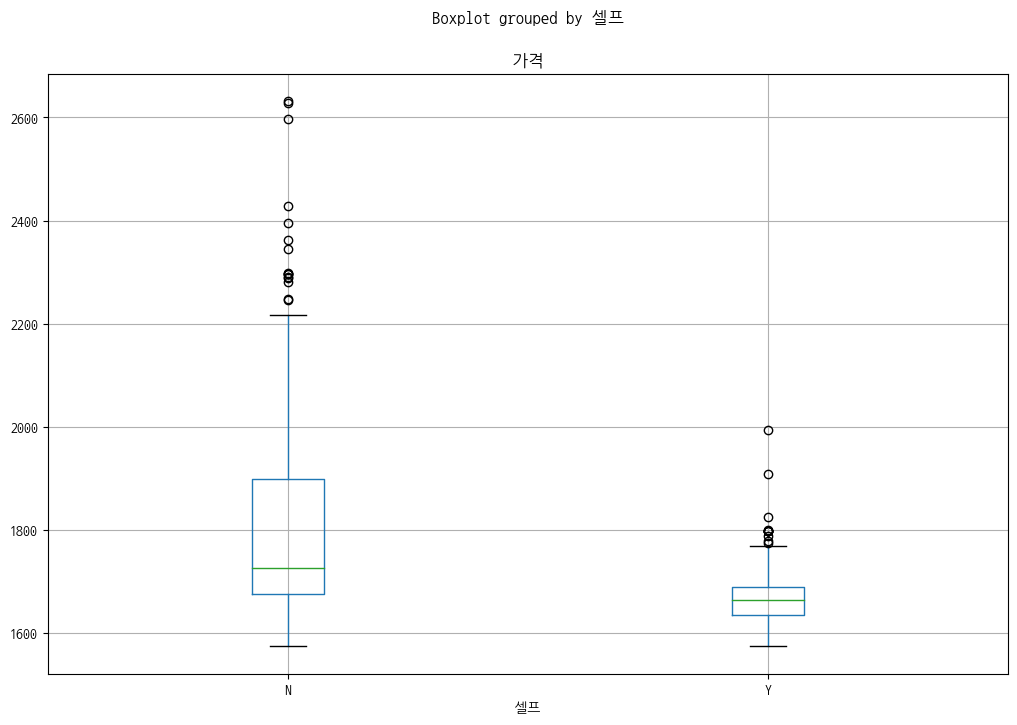

In [80]:
gas_data.boxplot(column="가격", by="셀프", figsize=(12,8));

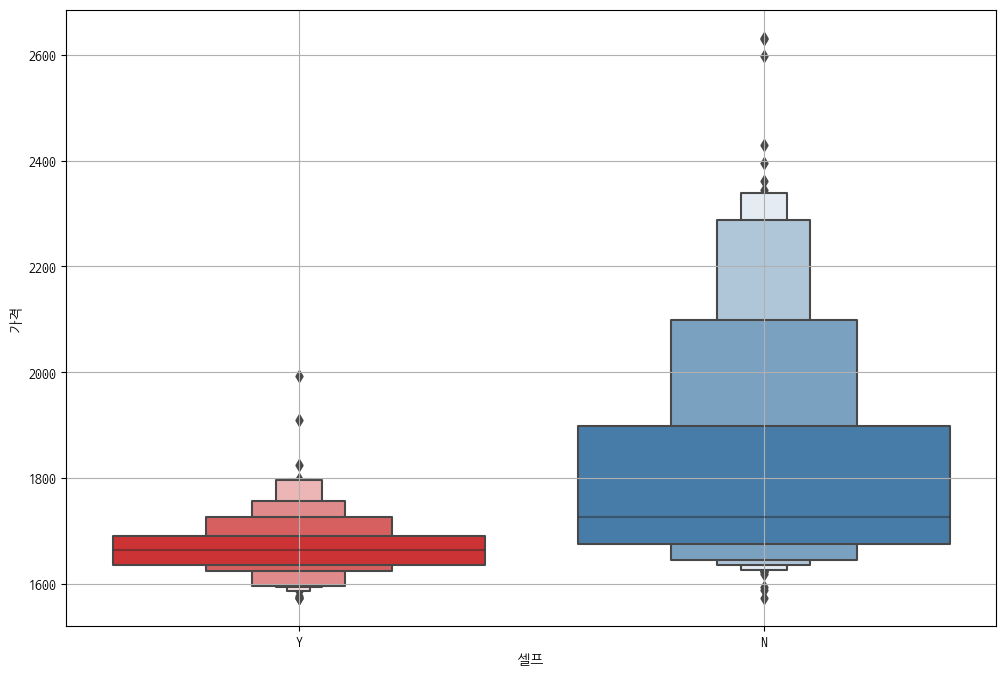

In [81]:
plt.figure(figsize=(12,8))
sns.boxenplot(x="셀프", y="가격", data = gas_data, palette='Set1')
plt.grid(True)
plt.show()

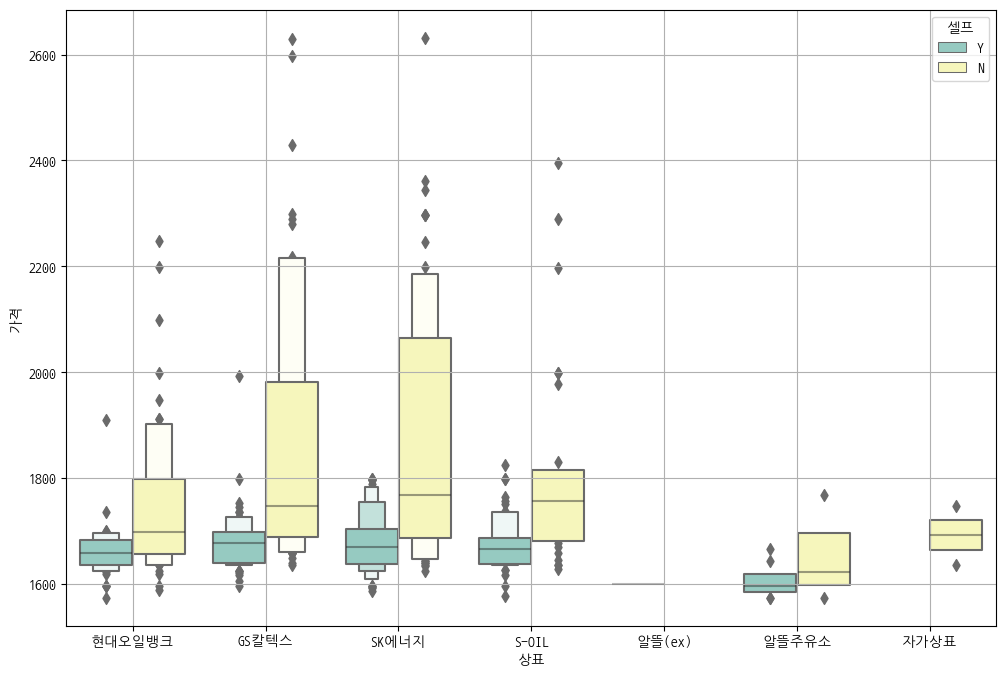

In [82]:
plt.figure(figsize=(12,8))
sns.boxenplot(x="상표", y="가격", hue='셀프', data=gas_data, palette="Set3")
plt.grid(True)
plt.show()

In [84]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [85]:
# 가장 비싼 주유소

gas_data.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
417,서남주유소,서울 중구 통일로 30,2632.0,N,SK에너지,중구
147,서계주유소,서울 용산구 청파로 367 (청파동),2629.0,N,GS칼텍스,용산구
377,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
416,필동주유소,서울 중구 퇴계로 196 (필동2가),2429.0,N,GS칼텍스,중구
88,양재최고주유소,서울 서초구 매헌로 72 (양재동),2395.0,N,S-OIL,서초구
376,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구
375,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
119,구로주유소,서울 구로구 구로동로 137 (구로동),2298.0,N,GS칼텍스,구로구
277,(주)중앙에너비스 혜화주유소,서울 종로구 창경궁로35길 1,2297.0,N,SK에너지,종로구
145,에너비스,서울 용산구 한남대로 82 (한남동),2297.0,N,SK에너지,용산구


In [86]:
# 가장 저렴한 주유소

gas_data.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
213,목화주유소,서울 강서구 국회대로 251 (화곡동),1574.0,Y,알뜰주유소,강서구
214,화곡역주유소,서울 강서구 강서로 154 (화곡동),1574.0,Y,알뜰주유소,강서구
215,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1574.0,Y,현대오일뱅크,강서구
216,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1574.0,N,알뜰주유소,강서구
246,현대주유소,서울 양천구 남부순환로 372 (신월동),1577.0,Y,S-OIL,양천구
217,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,1587.0,Y,SK에너지,강서구
247,형산석유(주)원주유소,서울 양천구 남부순환로 408,1589.0,N,현대오일뱅크,양천구
218,방화주유소,서울 강서구 방화동로 58-2 (방화동),1593.0,Y,SK에너지,강서구
248,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1594.0,Y,SK에너지,양천구
0,화랑대주유소,서울 노원구 화랑로 483,1595.0,Y,현대오일뱅크,노원구


## 구별 가격

In [87]:
import numpy as np

gu_data = pd.pivot_table(data=gas_data, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1916.058824
강동구,1760.928571
강북구,1642.750000
강서구,1680.393939
관악구,1711.357143


In [88]:
geo_path = "./data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map